In [25]:
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt

import h5py
import tables

import sys
sys.path.append('/scratch9/mkron/software/DeepIceLearning/Plots')
import plot_functions_mk as pfmk
from fancy_plot_mk import *

fancy_plot_mk.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib64/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib64/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/ga38tul/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ga38tul/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ga38tul/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/lib64/python2.7/site-packages/zmq/eventlo

In [2]:
 DATA_DIR = "/scratch9/mkron/data/training_data/third_dataset/small/"

# gives us all files in the directory
file_list=[]
for (dirpath, dirnames, filenames) in os.walk(DATA_DIR):
    file_list.extend(filenames)
    break
#print file_list
file_list = file_list[:40]

In [3]:
#make an np.array of the features of the X files, to not loop all the time
energy = []
true_energy = []
ClassLabel = []
StartingLabel = []
CoincidenceLabel = []
UpDownLabel = []
hitDOM = []
CascadeFilter = []
TrackFilter = []
zenith = []
tau_decay_length = []

for current_file in file_list:
        try:
            file = h5py.File(os.path.join(DATA_DIR, current_file), "r")
            print file
        except Exception:
            print "File {} failed".format(current_file) 
            break
        energy.append(file["reco_vals"]["depositedE"])
        true_energy.append(file["reco_vals"]["energyFirstParticle"])
        ClassLabel.append(file["reco_vals"]["ClassificationLabel"])
        StartingLabel.append(file["reco_vals"]["StartingLabel"])
        CoincidenceLabel.append(file["reco_vals"]["CoincidenceLabel"])
        UpDownLabel.append(file["reco_vals"]["UpDownLabel"])
        CascadeFilter.append(file["reco_vals"]["Cascade_Filter"])
        TrackFilter.append(file["reco_vals"]["Muon_Filter"])
        zenith.append(file["reco_vals"]['zenith'])
        tau_decay_length.append(file["reco_vals"]['TauDecayLength'])
        minHitDOM = []
        for i in xrange(len(file["charge"])):
            minHitDOM.append(np.count_nonzero(file["charge"][i]))
        hitDOM.append(minHitDOM)           
        file.close()
        
energy = np.array([item for sublist in energy for item in sublist])
true_energy = np.array([item for sublist in true_energy for item in sublist])
ClassLabel = np.array([item for sublist in ClassLabel for item in sublist])
StartingLabel = np.array([item for sublist in StartingLabel for item in sublist])
CoincidenceLabel = np.array([item for sublist in CoincidenceLabel for item in sublist])
UpDownLabel = np.array([item for sublist in UpDownLabel for item in sublist])
CascadeFilter = np.array([item for sublist in CascadeFilter for item in sublist])
TrackFilter = np.array([item for sublist in TrackFilter for item in sublist])
zenith = np.array([item for sublist in zenith for item in sublist])
tau_decay_length = np.array([item for sublist in tau_decay_length for item in sublist])
hitDOM = np.array([item for sublist in hitDOM for item in sublist])

<HDF5 file "File_103.h5" (mode r)>
<HDF5 file "File_117.h5" (mode r)>
<HDF5 file "File_100.h5" (mode r)>
<HDF5 file "File_105.h5" (mode r)>
<HDF5 file "File_127.h5" (mode r)>
<HDF5 file "File_131.h5" (mode r)>
<HDF5 file "File_104.h5" (mode r)>
<HDF5 file "File_130.h5" (mode r)>
<HDF5 file "File_11.h5" (mode r)>
<HDF5 file "File_115.h5" (mode r)>
<HDF5 file "File_128.h5" (mode r)>
<HDF5 file "File_123.h5" (mode r)>
<HDF5 file "File_126.h5" (mode r)>
<HDF5 file "File_118.h5" (mode r)>
<HDF5 file "File_102.h5" (mode r)>
<HDF5 file "File_135.h5" (mode r)>
<HDF5 file "File_116.h5" (mode r)>
<HDF5 file "File_10.h5" (mode r)>
<HDF5 file "File_113.h5" (mode r)>
<HDF5 file "File_136.h5" (mode r)>
<HDF5 file "File_124.h5" (mode r)>
<HDF5 file "File_120.h5" (mode r)>
<HDF5 file "File_111.h5" (mode r)>
<HDF5 file "File_106.h5" (mode r)>
<HDF5 file "File_110.h5" (mode r)>
<HDF5 file "File_125.h5" (mode r)>
<HDF5 file "File_101.h5" (mode r)>
<HDF5 file "File_112.h5" (mode r)>
<HDF5 file "File_12.h5

#### Size of the Dataset

In [25]:
total = len(energy)
print "We use {} HDF-Files".format(len(file_list))
print "\n"
print "Total number of events: {}".format(total)
print "Average of events in one HDF: {}".format(total/len(file_list))

We use 31 HDF-Files


Total number of events: 354487
Average of events in one HDF: 11435


#### Composition according to Purpose  (Training, Validation and Test Set)

In [27]:
train_frac = 30.
val_frac = 2.
test_frac = 2.
sum_frac = train_frac + val_frac + test_frac

In [28]:
print "Number of events in the TRAINING SET: {}".format((train_frac/sum_frac)*total)
print "Number of events in the VALIDATION SET: {}".format((val_frac/sum_frac)*total)
print "Number of events in the TEST SET: {}".format((test_frac/sum_frac)*total)
print "Percentage of TRAINING SET: {}".format((train_frac/sum_frac)*100)
print "Percentage of VALIDATION SET: {}".format((val_frac/sum_frac)*100)
print "Percentage of TEST SET: {}".format((test_frac/sum_frac)*100)

Number of events in the TRAINING SET: 312782.647059
Number of events in the VALIDATION SET: 20852.1764706
Number of events in the TEST SET: 20852.1764706
Percentage of TRAINING SET: 88.2352941176
Percentage of VALIDATION SET: 5.88235294118
Percentage of TEST SET: 5.88235294118


## Energy Distribution

###### deposited Energy

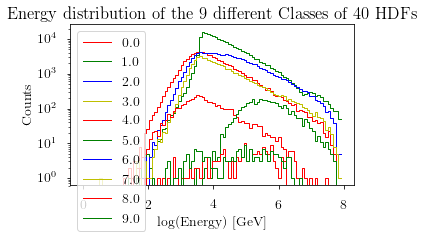

In [27]:
binnumber = 100
ibins = np.linspace(0,8,binnumber)
for i in [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]:
    vals, bins = np.histogram(np.log10(energy[ClassLabel == i]), bins=ibins)
    plt.semilogy(bins[:-1], vals, drawstyle='steps-pre', label=i)

plt.legend(loc='best')
plt.title("Energy distribution of the 9 different Classes of {} HDFs".format(len(file_list)))
plt.xlabel('log(Energy) [GeV]')
plt.ylabel('Counts')
plt.show()

### hit DOMs Histogramm

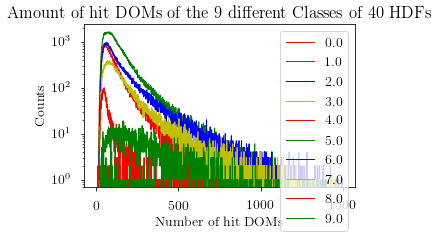

In [28]:
binnumber = 1500
ibins = np.linspace(0,binnumber,binnumber)
for i in [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]:
    vals, bins = np.histogram(hitDOM[ClassLabel == i], bins=ibins)
    plt.semilogy(bins[:-1], vals, drawstyle='steps-pre', label=i)

plt.legend(loc='best')
plt.title("Amount of hit DOMs of the 9 different Classes of {} HDFs".format(len(file_list)))
plt.xlabel('Number of hit DOMs')
plt.ylabel('Counts')
plt.show()

### tau decay length

In [23]:
#print tau_decay_length[ClassLabel == 1]

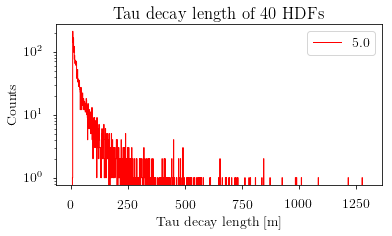

In [29]:
binnumber = 1300
ibins = np.linspace(0,binnumber,binnumber)
for i in [5.0]:
    vals, bins = np.histogram(tau_decay_length[ClassLabel == i], bins=ibins)
    plt.semilogy(bins[:-1], vals, drawstyle='steps-pre', label=i)

plt.legend(loc='best')
plt.title("Tau decay length of {} HDFs".format(len(file_list)))
plt.xlabel('Tau decay length [m]')
plt.ylabel('Counts')
plt.show()


## Distribution of Labels

In [31]:
def barchart(classes, values, title, ylabel, xlabel):
    fig, ax = plt.subplots()
    y_pos = np.arange(len(classes))
    couleur = ['#0000FF', '#0099FF', '#000000']
    total = sum(values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    for i in xrange(len(classes)):
        plt.text(y_pos[i], values[i]/2, '{:.2f}'.format(1.*values[i]/total), horizontalalignment="center",\
                 color="white")
                 #color="white" if values[i]/total < 0.25 else "black")
    plt.bar(y_pos, values, align='center', alpha=1.0, color=couleur)
    ax.set_xticks(range(len(classes)))
    ax.set_xticklabels(classes, rotation='25')
    plt.show()

In [35]:
def barchart_classes(classes, values, title, ylabel, xlabel):
    fig, ax = plt.subplots()
    y_pos = np.arange(len(classes))
    couleur = ['#0000FF', '#0099FF', '#000000']
    total = sum(values)
    title = "Event Distributon according to different classes of {} Events".format(total)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    for i in xrange(len(classes)):
        if 1.*values[i]/total > 0.95: 
            plt.text(y_pos[i], values[i]/2, '{:.2f}'.format(1.*values[i]/total), horizontalalignment="center",\
                     color="white")
                     #color="white" if values[i]/total < 0.25 else "black")
        plt.text(y_pos[i], values[i]/2, '{:.0f}'.format(1.*values[i]), horizontalalignment="center",\
                verticalalignment='bottom', rotation='90', color="white")
    plt.bar(y_pos, values, align='center', alpha=1.0, color=couleur)
    ax.set_xticks(range(len(classes)))
    ax.set_xticklabels(classes, rotation='90')
    plt.show()

In [68]:
val = [ClassLabel.tolist().count(0), ClassLabel.tolist().count(1), ClassLabel.tolist().count(2),\
          ClassLabel.tolist().count(3), ClassLabel.tolist().count(4), ClassLabel.tolist().count(5) , ClassLabel.tolist().count(6),\
          ClassLabel.tolist().count(7), ClassLabel.tolist().count(8), ClassLabel.tolist().count(9)]
val = np.log10(val)
barchart_classes(("Neutral Current", 'Cascade', 'Through Going Track', "Starting Track",\
          "Stopping Track", 'Double Bang', "Stopping Tau", "Glashow Cascade", "Glashow Track", "Glashow Tau"),\
         val,\
         'Event distribution', 'number of events', "Event Type")

/home/ga38tul/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/ga38tul/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


ValueError: cannot convert float NaN to integer

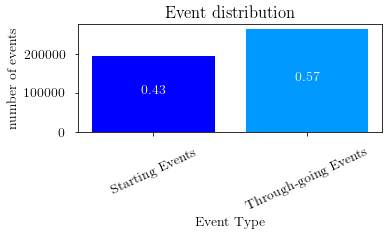

In [32]:
barchart(('Starting Events', 'Through-going Events'),\
         [StartingLabel.tolist().count(1.), StartingLabel.tolist().count(0)],\
         'Event distribution', 'number of events', "Event Type")



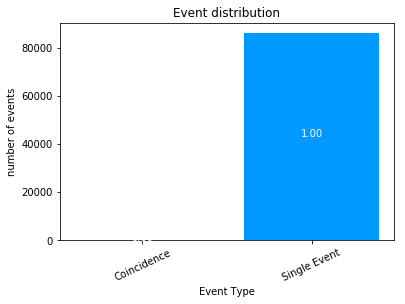

In [42]:
barchart(('Coincidence', 'Single Event'),\
         [CoincidenceLabel.tolist().count(1.), CoincidenceLabel.tolist().count(0)],\
         'Event distribution', 'number of events', "Event Type")

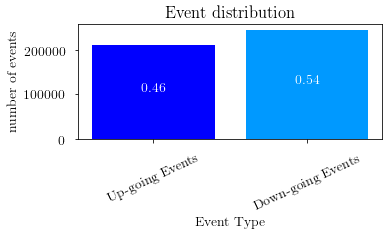

In [33]:
barchart(('Up-going Events', 'Down-going Events'),\
         [UpDownLabel.tolist().count(1.), UpDownLabel.tolist().count(0)],\
         'Event distribution', 'number of events', "Event Type")

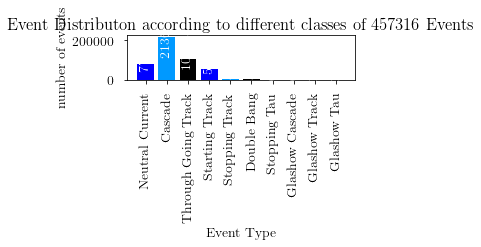

In [36]:
barchart_classes(("Neutral Current", 'Cascade', 'Through Going Track', "Starting Track",\
          "Stopping Track", 'Double Bang', "Stopping Tau", "Glashow Cascade", "Glashow Track", "Glashow Tau"),\
         [ClassLabel.tolist().count(0), ClassLabel.tolist().count(1), ClassLabel.tolist().count(2),\
          ClassLabel.tolist().count(3), ClassLabel.tolist().count(4), ClassLabel.tolist().count(5) , ClassLabel.tolist().count(6),\
          ClassLabel.tolist().count(7), ClassLabel.tolist().count(8), ClassLabel.tolist().count(9)],\
         'Event distribution', 'number of events', "Event Type")

## Filter Performence

In [39]:
# ReTag ClassLabel to Labels which can be predicted
ClassLabelRetag = ClassLabel
ClassLabelRetag[ClassLabel == 0] =1
ClassLabelRetag[ClassLabel == 1] =1
ClassLabelRetag[ClassLabel == 2] =2
ClassLabelRetag[ClassLabel == 3] =2
ClassLabelRetag[ClassLabel == 4] =2
ClassLabelRetag[ClassLabel == 5] =3
ClassLabelRetag[ClassLabel == 6] =3
ClassLabelRetag[ClassLabel == 7] =1
ClassLabelRetag[ClassLabel == 8] =2
ClassLabelRetag[ClassLabel == 9] =1

In [42]:
number_cascades = ClassLabelRetag.tolist().count(1)
number_tracks = ClassLabelRetag.tolist().count(2)
number_dbs = ClassLabelRetag.tolist().count(3)

barchart(('Cascades', 'Tracks', "DBs"),\
         [number_cacades, number_tracks, number_dbs],\
         'Event distribution', 'number of events', "Event Type")

NameError: name 'number_cacades' is not defined

In [24]:
total = number_cascades + number_tracks + number_dbs
print "Percentage of CASCADES in the set: {}".format(1.*number_cascades/total*100)
print "Percentage of TRACKS in the set: {}".format(1.*number_tracks/total*100)
print "Percentage of DBS in the set: {}".format(1.*number_dbs/total*100)

#if most cascades
print 1.*number_cascades/number_tracks #weight_track 
print 1.*number_cascades/number_dbs    #weight_db

Percentage of CASCADES in the set: 63.6483453584
Percentage of TRACKS in the set: 35.572911175
Percentage of DBS in the set: 0.778743466538
1.789236339
81.7321083172


In [39]:
def filter_triggered_performence(Filter, Label):
    right =0
    total =0
    for i in xrange(len(CascadeFilter)):
        if Filter[i] ==1:
            total +=1
            if ClassLabel[i] == Label:
                right +=1
    percentage = 1.*right/total*100
    print "Filter triggered, it was right in {}% of those events".format(percentage)
    return percentage    

In [40]:
def did_filter_trigger_performence(Filter, Label):
    right =0
    total =0
    for i in xrange(len(CascadeFilter)):
        if ClassLabel[i] == Label:
            total +=1
            if Filter[i] ==1:
                right +=1
    percentage = 1.*right/total*100
    print "Event happend, Filter triggered in {}% of those events".format(percentage)
    return percentage  

In [41]:
filter_triggered_performence(CascadeFilter, 1)
filter_triggered_performence(TrackFilter, 2)

did_filter_trigger_performence(CascadeFilter, 1)
did_filter_trigger_performence(TrackFilter, 2)

Filter triggered, it was right in 55.4401381362% of those events
Filter triggered, it was right in 23.6169832485% of those events
Event happend, Filter triggered in 97.9479279932% of those events
Event happend, Filter triggered in 93.0694872854% of those events


93.06948728535691

## Input Features

### Investigation on Single Event basis

In [89]:
file = h5py.File(os.path.join(DATA_DIR, 'File_0.h5'), "r")
#event_number = 3 #Track
event_number = 18 #Cascade
#file.keys()

###### Information on the Event

In [90]:
type = file["reco_vals"][event_number][3]
energy = file["reco_vals"][event_number][0]
print "Event Type: {}".format(type)
print "Energy: {} [GeV]".format(energy)

Event Type: 1.0
Energy: 141215.086507 [GeV]


#### first time

In [91]:
# gets a list with all values of each DOM for one event 
first_time_doms = []
for x in np.nditer(file["time"][event_number]):
    if x != 0:
        first_time_doms.append(x) 

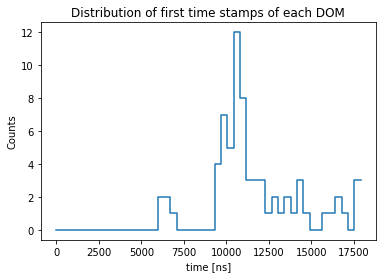

In [92]:
binnumber = 50
ibins = np.linspace(0,np.max(first_time_doms),binnumber)
vals, bins = np.histogram(first_time_doms, bins=ibins)
plt.title("Distribution of first time stamps of each DOM")
plt.ylabel("Counts")
plt.xlabel("time [ns]")
plt.plot(bins[:-1], vals , drawstyle='steps-pre')

#### time at 20% of charge

In [42]:
# gets a list with all values of each DOM for one event 
doms_list = []
for x in np.nditer(file["time_20pct"][event_number]):
    if x != 0:
        doms_list.append(x)

In [43]:
print file["reco_vals"][event_number]

(359.5835103446849, -14.0, 2.0, 732.3004290419833, 1.0, 0.0, 0.0)


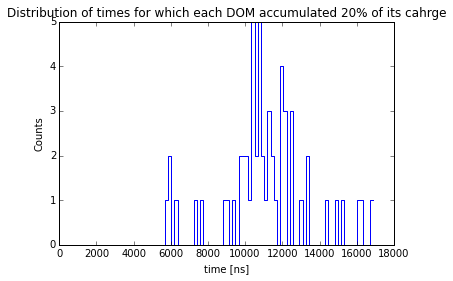

In [44]:
binnumber = 100
ibins = np.linspace(0,np.max(doms_list),binnumber)
vals, bins = np.histogram(doms_list, bins=ibins)
plt.title("Distribution of times for which each DOM accumulated 20% of its cahrge")
plt.ylabel("Counts")
plt.xlabel("time [ns]")
plt.plot(bins[:-1], vals , drawstyle='steps-pre')

# Waveform of single DOMS

In [ ]:
# Single DOM, Measured charge over time

# needed Information, not saved in the HDF-Files, I3-Files are neccesary

In [70]:
file = h5py.File(os.path.join(DATA_DIR, "File_1.h5"), "r")
file.keys()
file["reco_vals"].dtype

dtype([('depositedE', '<f8'), ('hitDOMs', '<f8'), ('firstParticle', '<f8'), ('energyFirstParticle', '<f8'), ('zenith', '<f8'), ('RunID', '<f8'), ('EventID', '<f8'), ('TauDecayLength', '<f8'), ('ClassificationLabel', '<f8'), ('StartingLabel', '<f8'), ('UpDownLabel', '<f8'), ('CoincidenceLabel', '<f8'), ('MinBias_Filter', '<f8'), ('Cascade_Filter', '<f8'), ('Muon_Filter', '<f8')])

### Intresting Quantities

##### zenith distribution
##### tau decay length for DB distribution
